In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qplot(x):
  return x.draw('mpl',scale=0.7, style= 'iqx', initial_state = True)

Text(0.5, 1.0, 'Sinusoidal function')

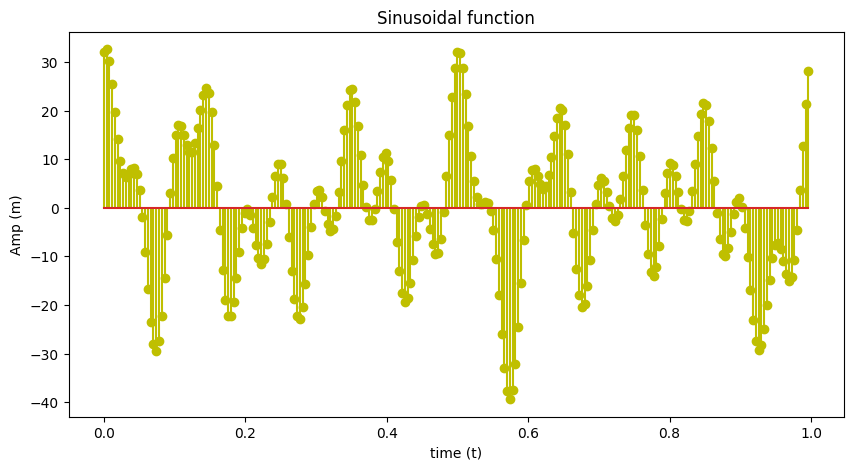

In [29]:
srate = 256  # sampling rate Hz

# time interval
t = np.arange(0. , 1. ,1/srate)

x1 = 5 * np.sin(2 * np.pi *3* t) # First sinewave

x2 = 2 * np.sin(2 * np.pi * 4 * t) # Second sinewave

x3 = 7 * np.sin(2 * np.pi * 10 * t) # Third sinewave

y4 = 9 * np.cos(2 * np.pi *6* t)   # First coswave

y5 = 12 * np.cos(2 * np.pi * 8 * t) # Second coswave

y6 = 11 * np.cos(2 * np.pi * 20 * t) # Third coswave

x =  x1 + x2 + x3  + y4 + y5 + y6


plt.figure(figsize=(10,5))
plt.stem(t,x, "yo")
plt.xlabel("time (t)")
plt.ylabel("Amp (m)")
plt.title("Sinusoidal function")

In [30]:
x

array([ 32.        ,  32.63786422,  30.23390015,  25.56871577,
        19.79606767,  14.16536505,   9.72831168,   7.09917797,
         6.32519775,   6.89723789,   7.8974336 ,   8.24783786,
         7.00002417,   3.59571898,  -1.96473842,  -9.08758125,
       -16.69431084, -23.44974517, -28.05686703, -29.54986324,
       -27.51683802, -22.19991646, -14.44901394,  -5.53971024,
         3.10261474,  10.20842364,  14.92872597,  16.99799842,
        16.75863185,  15.04294602,  12.94238688,  11.52001247,
        11.53553391,  13.24891243,  16.34960865,  20.02851927,
        23.17553968,  24.65563045,  23.59736214,  19.62464895,
        12.97554441,   4.4784662 ,  -4.61020622, -12.87048354,
       -19.02423044, -22.21102906, -22.17048256, -19.28879811,
       -14.4992036 ,  -9.05991083,  -4.26189505,  -1.13499002,
        -0.22088685,  -1.4655672 ,  -4.25530377,  -7.58633726,
       -10.32673038, -11.50717048, -10.5707703 ,  -7.52178133,
        -2.93724415,   2.16175293,   6.5490779 ,   9.08

In [31]:
np.max(x)

32.63786422033401

In [32]:
const = np.sqrt(sum(x**2))
const

232.96351645697658

Text(0.5, 1.0, 'Sinusoidal function')

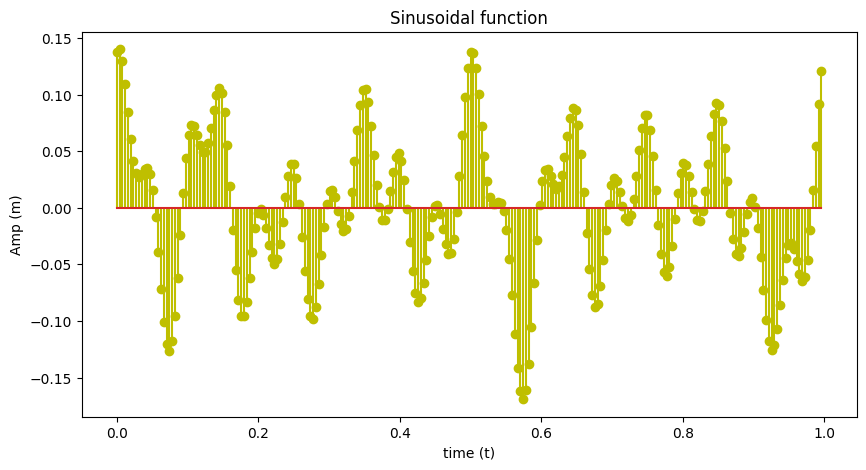

In [33]:
x_norm = x/const


plt.figure(figsize=(10,5))
plt.stem(t,x_norm, "yo")
plt.xlabel("time (t)")
plt.ylabel("Amp (m)")
plt.title("Sinusoidal function")

How is the normalization of x situation?

In [34]:
sum(x_norm**2)

1.0

In [35]:
np.max(x_norm)

0.14009860735580684

# FFT

In [36]:
X = np.fft.fft(x)/len(t)

Text(0.5, 1.0, 'DFT of Multi-Frequency Signal')

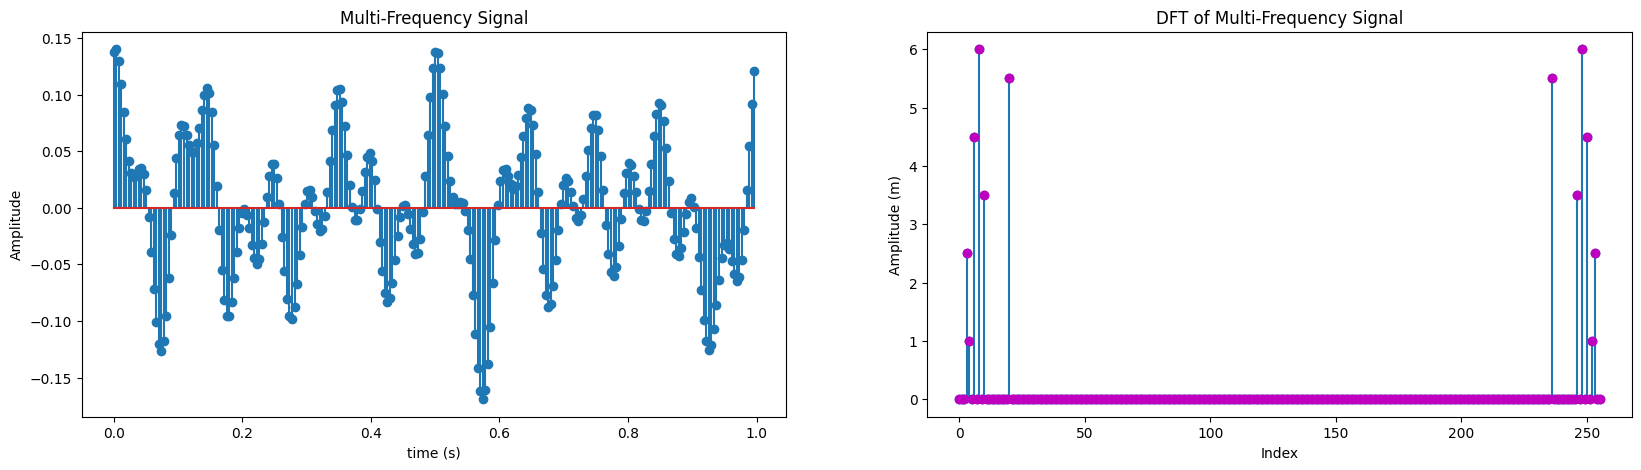

In [47]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("Multi-Frequency Signal")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of Multi-Frequency Signal')

## Create a list for using in qiskit inialization function

In [38]:
ampl = []
for i in range(srate):
  ampl.append(x_norm[i])

len(ampl)

256

# Qiskit Implementation of QFT for a sinusoidal function
$$ x(t) = x_1(t)+x_2(t)+x_3(t)  + y_4(t) + y_5(t) + y_6(t) $$
where
$$x_i(t) = A_i sin(2π f_i t/s_{rate}) \qquad \text{for}\quad i\in 1,2,3$$
and
$$y_i(t) = A_i sin(2π f_i t/s_{rate}) \qquad \text{for}\quad i\in 4, 5, 6$$
for amplitude values:
$$ A_1 = 5 m\quad A_2 = 2 m\quad A_3 = 7 m\quad A_4 = 9 m\quad A_5 = 12 m\quad A_6 = 11 m\quad  $$ \\
and frequencies:
$$ f_1 = 3 m\quad f_2 = 4 m\quad f_3 = 10 m\quad f_4 = 6 m\quad f_5 = 8 m\quad f_6 = 20 m\quad  $$ \\

The sampling rate is
$$s_{rate} = 256$$
that is equall to the $N$.

In [39]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.circuit.library import QFT

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


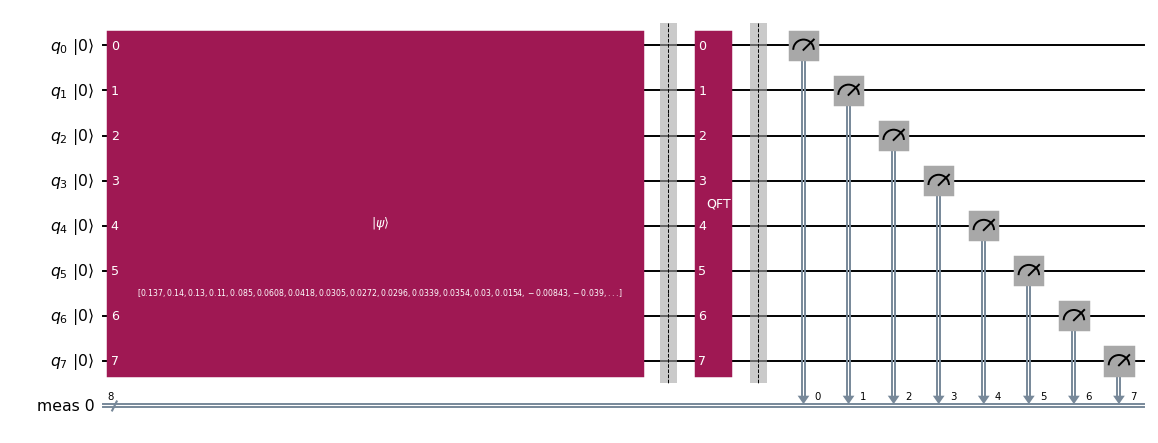

In [40]:
# 1. How many qubits do we need?
n = int(np.log2(srate))

# 2. create a quantum circuit with n qubit
qc = QuantumCircuit(n)

# Initialization of discritized signal x_norm
qc.initialize(ampl,[[0],[1],[2],[3],[4],[5],[6],[7]])
qc. barrier()

# Computing the QFT
qft = QFT(num_qubits=n)
qc = qc.compose(qft)

# measurement
qc.measure_all()

# visualization
qplot(qc)


# Simulating the measurement

In [41]:
from qiskit_aer import AerSimulator

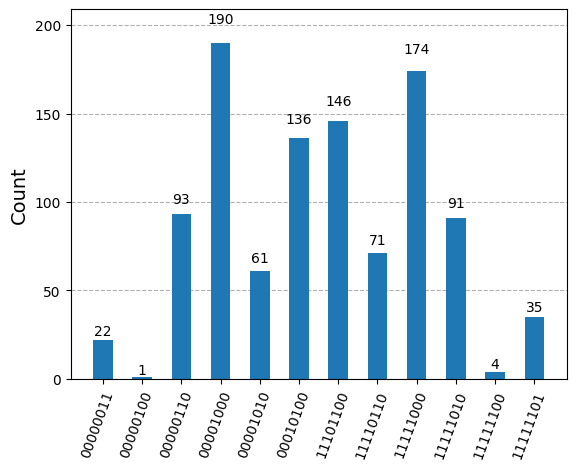

In [42]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run and get counts
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

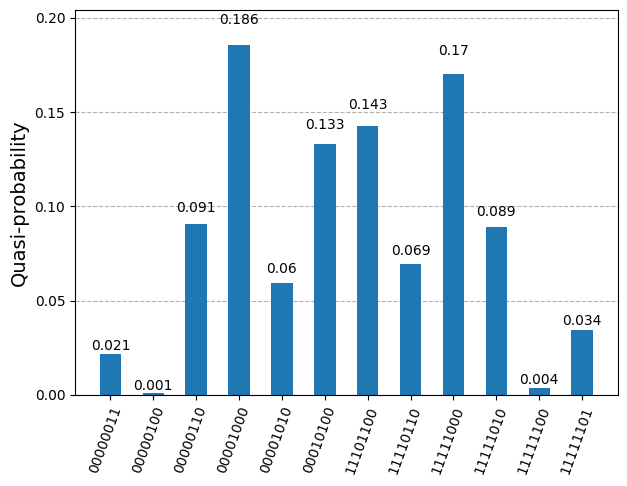

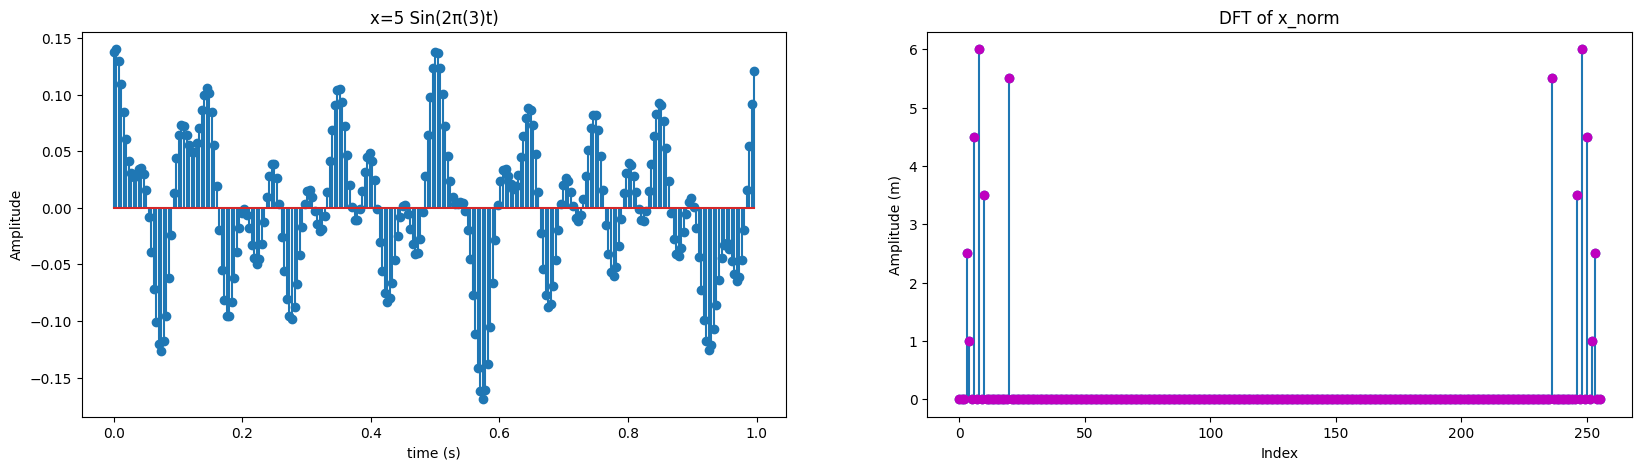

In [43]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

plot_distribution(counts)

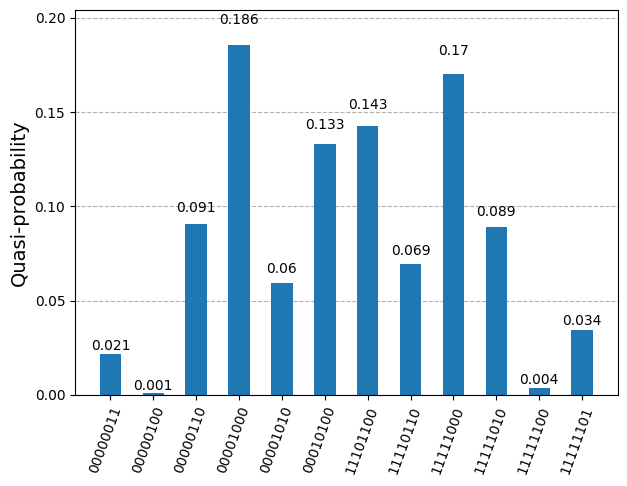

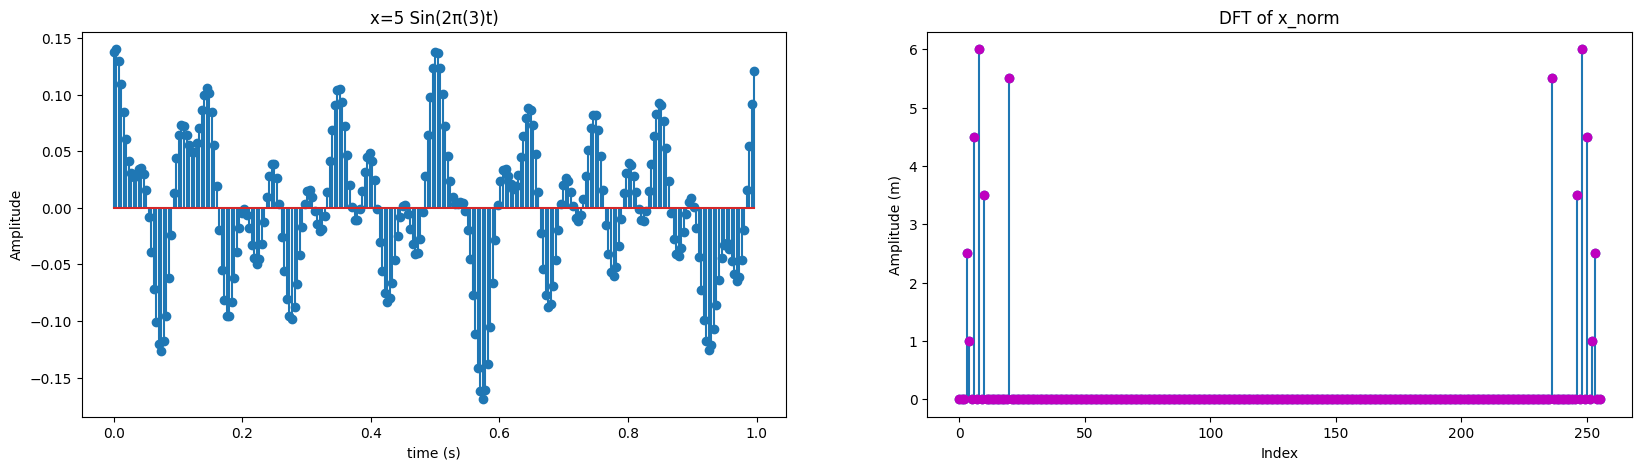

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

plot_distribution(counts)

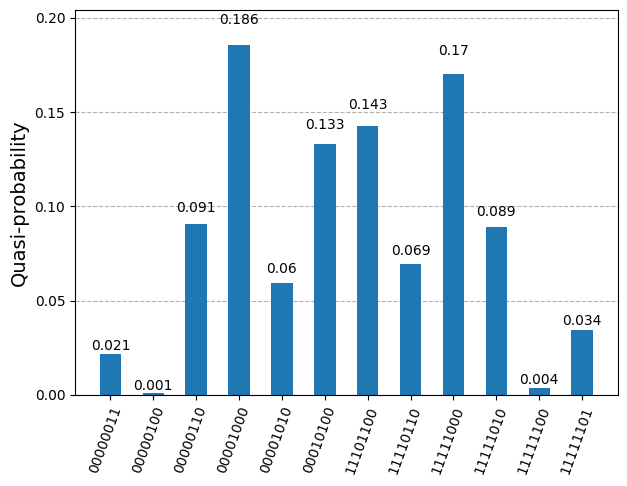

In [48]:
plot_distribution(counts)

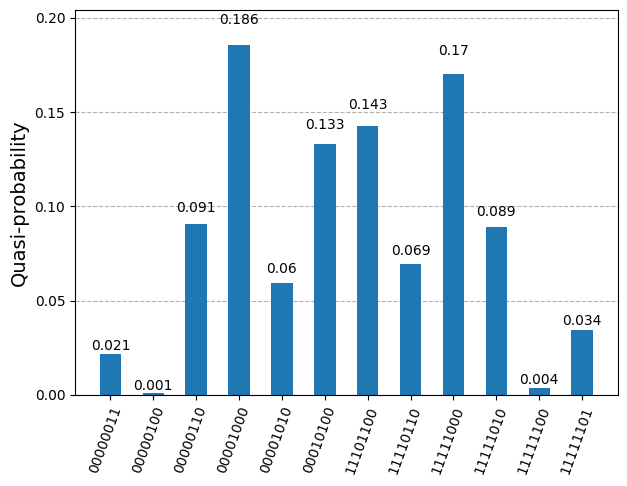

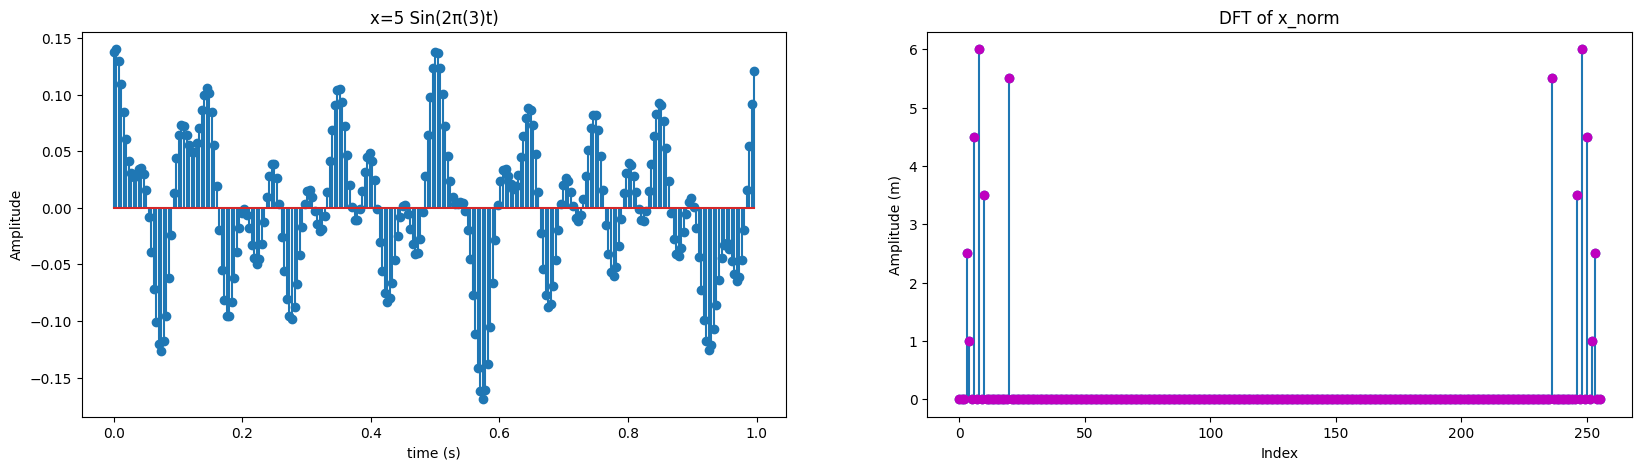

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

plot_distribution(counts)

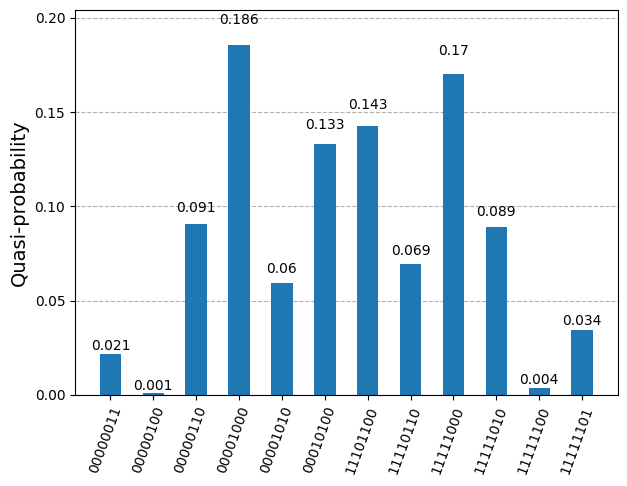

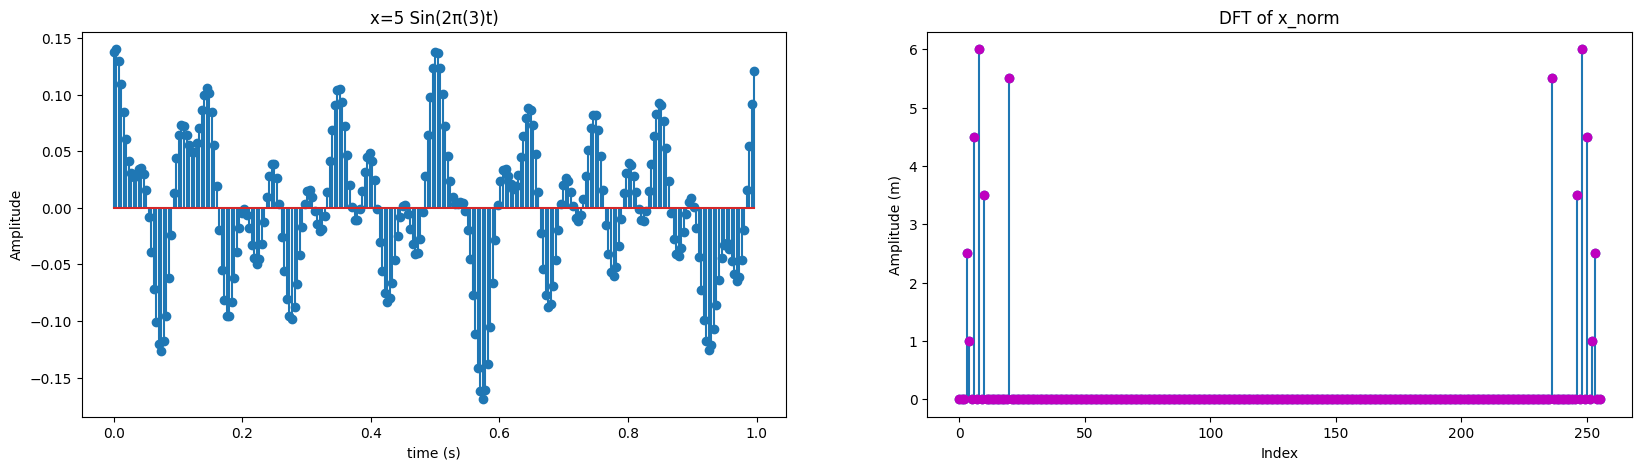

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.stem(t,x_norm)
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.title("x=5 Sin(2π(3)t)")

plt.subplot(1,2,2)
plt.stem(np.abs(X))
plt.plot(np.abs(X),'mo')
plt.xlabel('Index')
plt.ylabel('Amplitude (m)')
plt.title('DFT of x_norm')

plot_distribution(counts)

In [44]:
counts

{'11111100': 4,
 '00000100': 1,
 '00001010': 61,
 '11111000': 174,
 '11101100': 146,
 '00000110': 93,
 '11110110': 71,
 '11111010': 91,
 '00001000': 190,
 '11111101': 35,
 '00000011': 22,
 '00010100': 136}

In [45]:
# Initialize a list to store the converted integers
converted_integers = []

# Iterate through the measurement results
for binary_string, count in counts.items():
    # Split the binary string into individual components
    components = binary_string.split(' ')
    # Concatenate the components to form a single binary string
    concatenated_binary = ''.join(components)
    # Convert the concatenated binary string to an integer
    integer_value = int(concatenated_binary, 2)
    # Append the integer value to the list
    converted_integers.append(integer_value)

print('Frequencies in order are ', np.sort(converted_integers)[:6])

Frequencies in order are  [ 3  4  6  8 10 20]
